In [3]:
import numpy as np
import re # Регулярные выражения
import mailbox # 
import csv # Использование csv-файлов

import pandas as pd
import pandas.plotting

import matplotlib
import matplotlib.pyplot as pp

import scipy.stats # Scipy – математическая библиотека, еще одна надстройка NumPy
from IPython import display # iPython – интерактивная оболочка языка в Anaconda, поддерживает спецсинтаксис, подсветку и проч.
from ipywidgets import interact, widgets

%matplotlib inline

In [14]:
gapminder = pd.read_csv('детская-смертность.xls') 

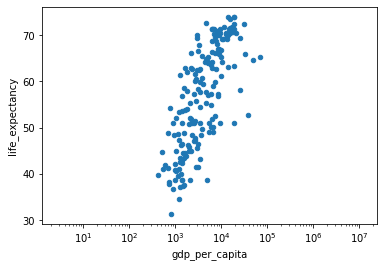

In [17]:
def plotyear(year): # Создадим функцию "построить график по годам"
    data = gapminder[gapminder.year == year] # Создадим объект data, чтобы привести табличные данные в нужное состояние
    # В атаблице есть столбец year, его-то мы и передадим в объект
    # Запросим точечный график взаимосвязи между ВВП и длительностьью жизни
    data.plot.scatter('gdp_per_capita', 'life_expectancy', logx = True) 

plotyear(1965)

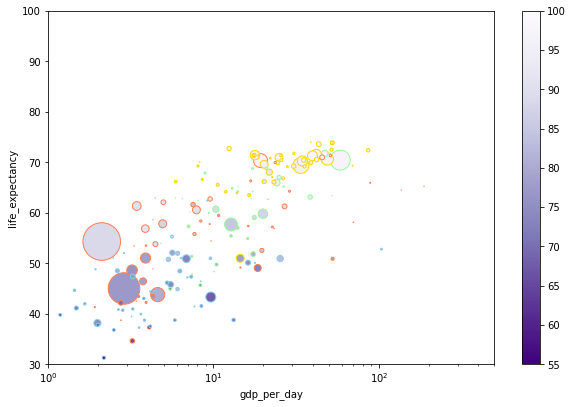

In [39]:
def plotyear(year): 
    # Сортируем данные по столбцу "население", отключим сортировку "от большего к меньшему"
    data = gapminder[gapminder.year == year].sort_values('population', ascending=False) 
    area = 2e-6 * data.population # Уменьшим с помощью коэффициента 2e-6 размер точек на графике
    # Зададим некоторым регионам цвета
    edgecolor = data.region.map({'Africa': 'skyblue', 'Europe': 'gold', 'America': 'palegreen', 'Asia': 'coral'})
    
    # Поскольку по умолчанию он слишком большой для такого количества данных. Это выражение равно 2 статысячным
    # Зададим ширину границы 1, цвет границы 'k' (черный)
    color = data.age5_surviving
    data.plot.scatter('gdp_per_day', 'life_expectancy', logx = True, s = area, c = color, 
                      # Кастомизируем цвет графика, сделаем градиенту фиолетового, с минимальной и максимальной границами
                      colormap = matplotlib.cm.get_cmap('Purples_r'), vmin = 55, vmax = 100,
                      # Зададим площадь точек s. чтобы отобразить боковую градиентную шкалу для удобства сопоставления, 
                      # используем sharex = False. Зададим размер занимаемой плоскости
                      linewidths = 1, edgecolors = edgecolor, sharex = False, figsize = (10, 6.5)) 
    pp.axis(xmin = 1, xmax = 500, ymin = 30, ymax = 100) # Укрупним фигуру немного

plotyear(1965)

In [33]:
# Сделаем график интерактивным: выбор года
interact(plotyear, year = range(1965, 2016, 10))

interactive(children=(Dropdown(description='year', options=(1965, 1975, 1985, 1995, 2005, 2015), value=1965), …

<function __main__.plotyear(year)>

In [34]:
# По мере хода лет население и ВВП увеличивается, особенно заметно по Китаю, смотрите
# Суммируем все население Земли и поделим на население каждого региона, чтобы увидеть самые густонаселенные в 2015 году.
# Используем метод groupby
gapminder[gapminder.year == 2015].groupby('region').population.sum()

region
Africa     1.172161e+09
America    9.865771e+08
Asia       4.299142e+09
Europe     8.345345e+08
Name: population, dtype: float64

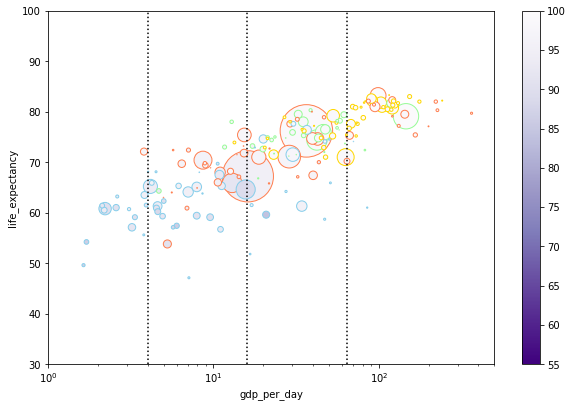

In [36]:
# Скопируем код
def plotyear(year): 
    data = gapminder[gapminder.year == year].sort_values('population', ascending=False) 
    area = 2e-6 * data.population # Уменьшим с помощью коэффициента 2e-6 размер точек на графике
    edgecolor = data.region.map({'Africa': 'skyblue', 'Europe': 'gold', 'America': 'palegreen', 'Asia': 'coral'})
    
    color = data.age5_surviving
    data.plot.scatter('gdp_per_day', 'life_expectancy', logx = True, s = area, c = color, 
                       colormap = matplotlib.cm.get_cmap('Purples_r'), vmin = 55, vmax = 100,
                       linewidths = 1, edgecolors = edgecolor, sharex = False, figsize = (10, 6.5)) 
    
    # Отобразим верикальные разделительные черты – 4, 16, 64 доллара
    for level in [4, 16, 64]:
        pp.axvline(level, linestyle = ':', color = 'k')
    pp.axis(xmin = 1, xmax = 500, ymin = 30, ymax = 100) # Укрупним фигуру немного

plotyear(2015)